# Introduction to Machine Learning

This notebook goes through the basics of linear regression. Please do this lab if this is your first course in machine learning.

In [1]:
# imports

import os, codecs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Linear Regression

Reminder:

* **Regression**: predict real/continuous values given inputs.
* **Classification**: predict categorical values from a finte set, given inputs.

Model:

$y = w_0 + \sum_{j=1}^{d}w_j x_j + \epsilon$

Closed-form solution:

$w = \Big(X^TX\Big)^{-1}X^Ty$

Predictions using a fitted model:

$\hat{y} = Xw$

## A toy example

In [2]:
# Let's start with a toy example

mean = [0, 0] # means (centers of mass)
cov = [[5, 0], [120, 100]]  # covariance

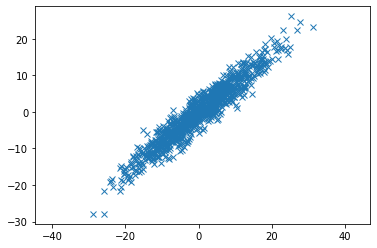

In [3]:
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 1000, check_valid='ignore').T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [4]:
np.corrcoef(x,y)

array([[1.        , 0.95718374],
       [0.95718374, 1.        ]])

In [5]:
# Let's fit a linear model to the data at hand

beta = 1/(np.dot(x.T,x)) * np.dot(x.T,y)

In [6]:
beta # in this 2d example this is the slope of the line

0.8075409800260642

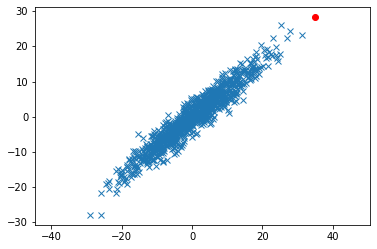

In [7]:
# let us try with a new point
new_point = 35
y_hat = beta * new_point
plt.plot(x, y, 'x')
plt.plot(new_point, y_hat, 'o', c='red')
plt.axis('equal')
plt.show()

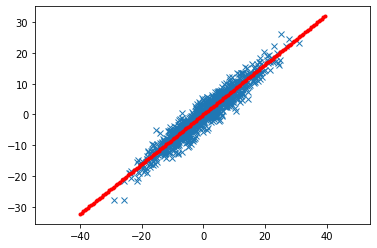

In [8]:
# many new points
new_points = np.arange(-40,40,0.5)
predictions = beta * new_points
plt.plot(x, y, 'x')
plt.plot(new_points, predictions, '.', c='red')
plt.axis('equal')
plt.show()

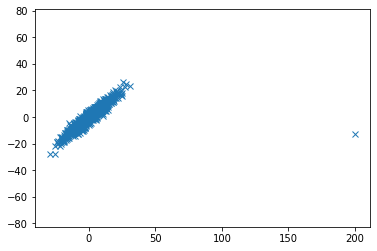

In [9]:
# Let's add an outlier and see what happens

x[0] = 200
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [10]:
# Let's fit a linear model to the data again

beta = 1/(np.dot(x.T,x)) * np.dot(x.T,y)

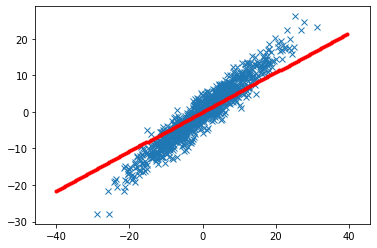

In [11]:
new_points = np.arange(-40,40,0.5)
predictions = beta * new_points
plt.plot(x, y, 'x')
plt.plot(new_points, predictions, '.', c='red')
plt.axis('equal')
plt.xlim((-40,40))
plt.show()

## Adding the intercept

In [12]:
# An example with the intercept

mean = [0, 15] # means (centers of mass)
cov = [[5, 0], [120, 100]]  # covariance

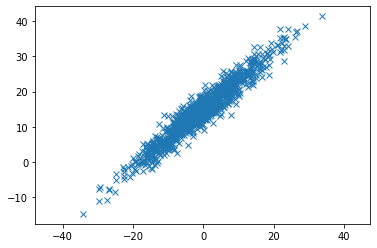

In [13]:
# note that we are no longer centered at zero
x, y = np.random.multivariate_normal(mean, cov, 1000, check_valid='ignore').T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [14]:
# Let's fit a linear model to the data at hand

beta = 1/(np.dot(x.T,x)) * np.dot(x.T,y)

In [15]:
beta

0.7306285011741515

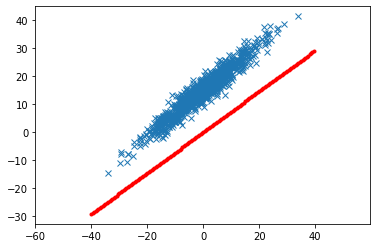

In [16]:
new_points = np.arange(-40,40,0.5)
predictions = beta * new_points
plt.plot(x, y, 'x')
plt.plot(new_points, predictions, '.', c='red')
plt.axis('equal')
plt.show()

This does not work any longer, as the default intercept is at 0,0. We need to fit for the intercept as well as for the slope.

In [17]:
# Let us add a new column to x, all to 1: this will allow us to fit for the intercept as well

X = np.matrix([np.ones(x.shape[0]),x]).T

In [18]:
print(X.shape)
print(X[:10,:])

(1000, 2)
[[  1.          17.41092638]
 [  1.         -22.69049277]
 [  1.          -2.10455296]
 [  1.           3.55650501]
 [  1.          15.06428761]
 [  1.         -19.07447581]
 [  1.          -5.93076979]
 [  1.           6.81162018]
 [  1.           8.93065608]
 [  1.          -5.1272745 ]]


In [19]:
# This is the same, but we need a little bit more machinery to deal with matrices

betas = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y).T)

In [20]:
betas

matrix([[15.05660765],
        [ 0.81305127]])

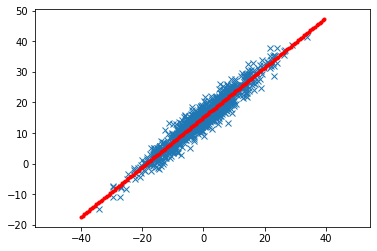

In [21]:
new_points = np.arange(-40,40,0.5)
predictions = betas[1,0] * new_points
plt.plot(x, y, 'x')
plt.plot(new_points, betas[0,0] + predictions, '.', c='red')
plt.axis('equal')
plt.show()

## Non-linear data

The limits of vanilla linear models on non-linear data:

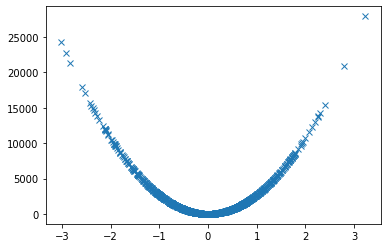

In [22]:
# Consider the following dataset
from sklearn.datasets import make_regression # a simpler way to create regression data
x, y = make_regression(n_samples=1000, n_features=1, noise=0.2)
y = np.power(y,2)
plt.plot(x, y, 'x')
plt.show()

Let us try to fit a linear model to it.

In [23]:
X = np.matrix([np.ones(x.shape[0]),x.ravel()]).T

In [24]:
betas = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y).T)

In [25]:
betas

matrix([[2363.82718629],
        [-371.934514  ]])

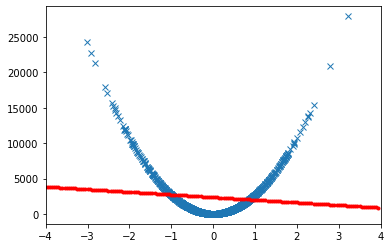

In [26]:
new_points = np.arange(-4,4,0.05)
predictions = betas[1,0] * new_points
plt.plot(x, y, 'x')
plt.plot(new_points, betas[0,0] + predictions, '.', c='red')
plt.xlim((-4,4))
plt.show()

## Exercises

* What is the problem of applying linear regression to this dataset?
* Can you think of a solution, still using linear regression?

# Scikit-learn for linear regression

Scikit-learn (or sklearn) is a very good ML library with rich documentation and an elegant API: https://scikit-learn.org/stable.

It exposes many models with the same API. For example, linear regression looks as follows:

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=1000, n_features=1, noise=15)

linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression()

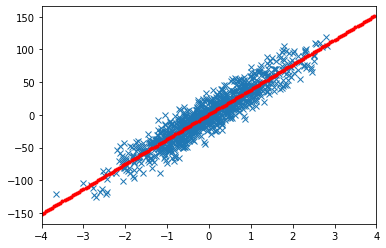

In [28]:
new_points = np.arange(-4,4,0.05)
predictions = linreg.predict(new_points.reshape(-1, 1))
plt.plot(x, y, 'x')
plt.plot(new_points, predictions, '.', c='red')
plt.xlim((-4,4))
plt.show()

---